In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [5, 5],
'axes.labelsize': 20,
'axes.titlesize':24,
'font.size': 14,
'legend.fontsize': 14,
'xtick.labelsize': 18,
'ytick.labelsize': 18
}
plt.rcParams.update(params)

In [4]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

**Identity function**

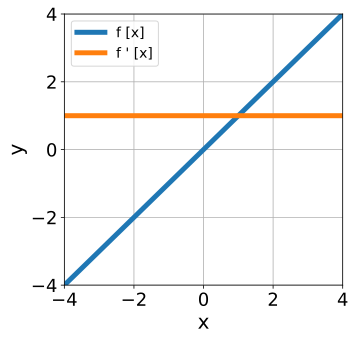

In [5]:
plt.figure(figsize=(5, 5))
x = np.linspace(-4, 4, 100)
y = x
dy = np.ones(x.shape)
plt.plot(x, y, LineWidth=5, label='f [x]')
plt.plot(x, dy, LineWidth=5, label='f \' [x]')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-4, -2, 0, 2, 4])
plt.xlabel('x')
plt.ylabel('y')


plt.savefig('../figs/ann_identity_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

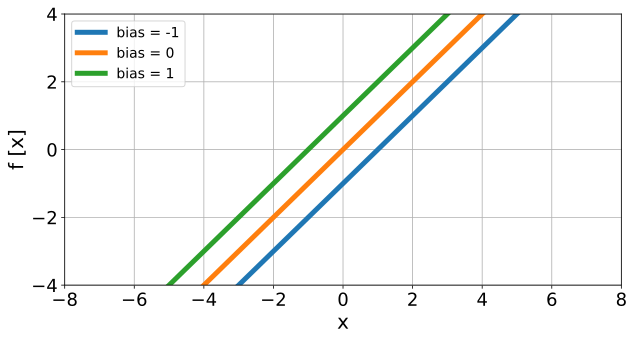

In [6]:
plt.figure(figsize=(10, 5))
cor = 0
for bias in range(-1, 2):
    x = np.linspace(-8, 8, 100)
    y = x + bias
    plt.plot(x, y, LineWidth=5, color=colors[cor], label='bias = %s' % bias)
    cor += 1
plt.legend()
plt.grid(True)
plt.xlim(-8, 8)
plt.ylim(-4, 4)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
plt.yticks([-4, -2, 0, 2, 4])
plt.xlabel('x')
plt.ylabel('f [x]')
# plt.savefig('../figs/ann_identity_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Unit (Binary) Step function**

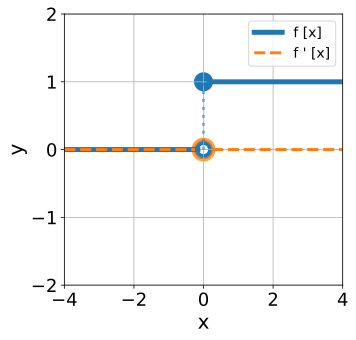

In [7]:
plt.figure(figsize=(5, 5))

x1 = np.linspace(-4, 0, 50)
x2 = np.linspace(0, 4, 50)

y1 = np.heaviside(x1, 0)
y2 = np.heaviside(x2, 1)

dy1 = np.zeros(x1.shape)
dy2 = np.zeros(x2.shape)

plt.plot(x1[:-2], y1[:-2], LineWidth=5, color=colors[0], label='f [x]')
plt.scatter(0, 0, facecolors='none', edgecolors=colors[0], marker='o', s=200, linewidth=5)
plt.plot(x2[2:], y2[2:], LineWidth=5, color=colors[0])
plt.scatter(0, 1, facecolors=colors[0], edgecolors=colors[0], marker='o', s=200, linewidth=5)

plt.plot(np.zeros([50, 1]), np.linspace(0,1,50), ':', LineWidth=3, color=colors[0], alpha=0.5)

plt.plot(x1[:-3], dy1[:-3], '--', LineWidth=3, color=colors[1], label='f \' [x]')
plt.scatter(0, 0, facecolors='none', edgecolors=colors[1], marker='o', s=400, linewidth=4, alpha=0.75)
plt.plot(x2[3:], dy2[3:], '--', LineWidth=3, color=colors[1])

plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../figs/ann_unit_step_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

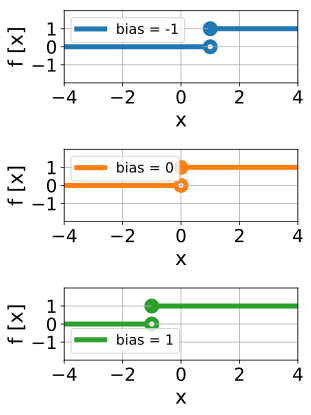

In [8]:
plt.figure(figsize=(8, 6))

cor = 0
for bias in range(-1, 2):
    
    plt.subplot(3,2,2*cor+1)
                    
    x = np.linspace(-4, 4, 100)
    y = np.heaviside(x + bias, 1)

    zeros_x = [x[i] for i in np.where(y==0)[0]]
    zeros_y = np.array([int(y[i]) for i in np.where(y==0)[0]])

    ones_x = [x[i] for i in np.where(y==1)[0]]
    ones_y = np.array([int(y[i]) for i in np.where(y==1)[0]])

    plt.plot(zeros_x[:-3], zeros_y[:-3], LineWidth=5, color=colors[cor], label='bias = %s' % bias)
    plt.plot(ones_x, ones_y, LineWidth=5, color=colors[cor])
    plt.legend()
    plt.scatter(-bias, 0, facecolors='none', edgecolors=colors[cor], marker='o', s=100, linewidth=5)
    plt.scatter(-bias, 1, facecolors=colors[cor], edgecolors=colors[cor], marker='o', s=100, linewidth=5)
    cor += 1

    plt.grid(True)
    plt.xlim(-4, 4)
    plt.ylim(-2, 2)
    plt.xticks([-4, -2, 0, 2, 4])
    plt.xlabel('x')
    plt.yticks([-1, 0, 1])
    plt.ylabel('f [x]')
    
    
plt.tight_layout()
# plt.savefig('../figs/ann_unit_step_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Logistic (Sigmoid or Soft Step) function**

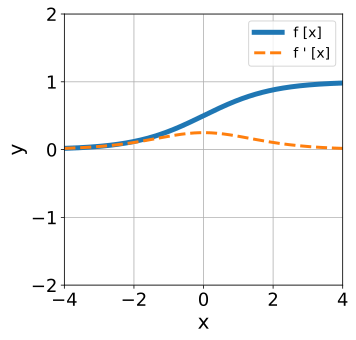

In [9]:
plt.figure(figsize=(5, 5))
x = np.linspace(-4, 4, 1000)
y = 1 / (1 + np.exp(-(x)))
dy = y * (1 - y)
plt.plot(x, y, '-', LineWidth=5, color=colors[0], label='f [x]')
plt.plot(x, dy, '--', LineWidth=3, color=colors[1], label='f \' [x]')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../figs/ann_logistic_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

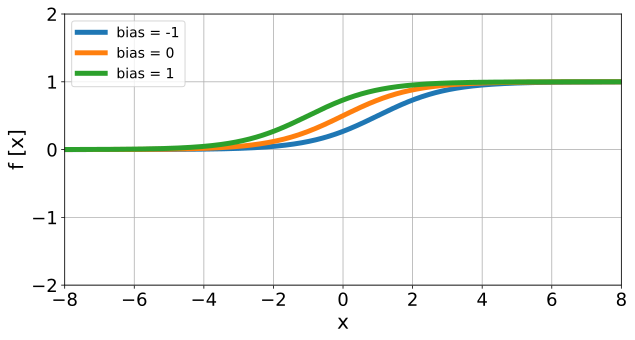

In [10]:
plt.figure(figsize=(10, 5))
cor = 0
for bias in range(-1, 2):
    x = np.linspace(-8, 8, 1000)
    y = 1 / (1 + np.exp(-(x + bias)))
    plt.plot(x, y, LineWidth=5, color=colors[cor], alpha=1, label='bias = %s' % bias)
    cor += 1
plt.legend()
plt.grid(True)
plt.xlim(-8, 8)
plt.ylim(-2, 2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('f [x]')
# plt.savefig('../figs/ann_logistic_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Hyperbolic Tangent function**

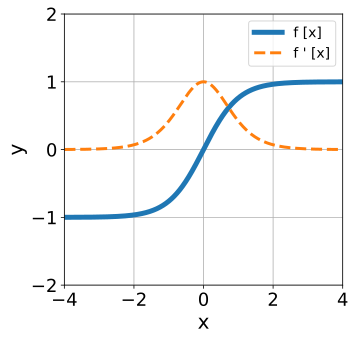

In [11]:
plt.figure(figsize=(5, 5))
x = np.linspace(-4, 4, 1000)
y = np.tanh(x)
dy = 1 - y ** 2
plt.plot(x, y, '-', LineWidth=5, color=colors[0], label='f [x]')
plt.plot(x, dy, '--', LineWidth=3, color=colors[1], label='f \' [x]')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../figs/ann_tanh_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

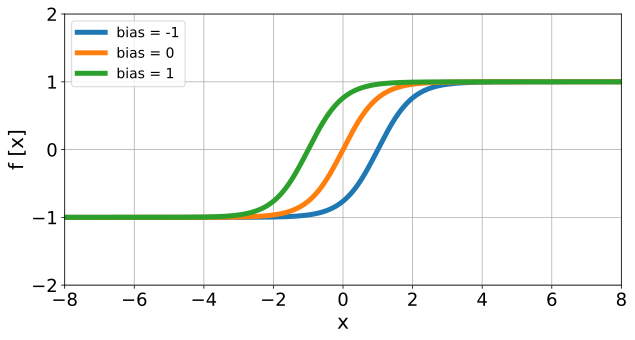

In [12]:
plt.figure(figsize=(10, 5))
cor = 0
for bias in range(-1, 2):
    x = np.linspace(-8, 8, 1000)
    y = np.tanh(x + bias)
    plt.plot(x, y, LineWidth=5, color=colors[cor], alpha=1, label='bias = %s' % bias)
    cor += 1
plt.legend()
plt.grid(True)
plt.xlim(-8, 8)
plt.ylim(-2, 2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('f [x]')
# plt.savefig('../figs/ann_tanh_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Arc Tangent function**

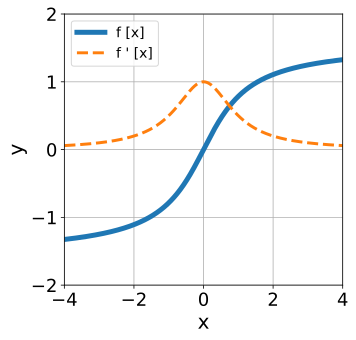

In [13]:
plt.figure(figsize=(5, 5))
x = np.linspace(-4, 4, 1000)
y = np.arctan(x)
dy = 1 / (x ** 2 + 1)
plt.plot(x, y, '-', LineWidth=5, color=colors[0], label='f [x]' )
plt.plot(x, dy, '--', LineWidth=3, color=colors[1], label='f \' [x]' )
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../figs/ann_arctan_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

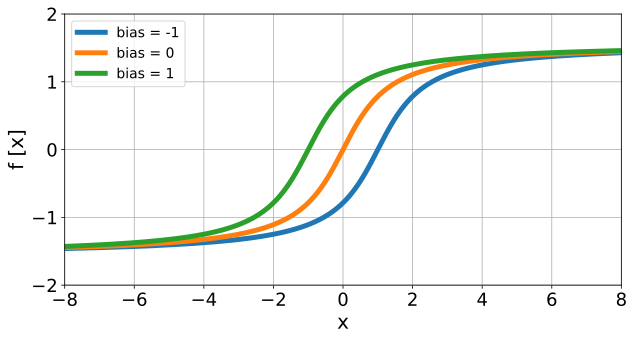

In [14]:
plt.figure(figsize=(10, 5))
cor = 0
for bias in range(-1, 2):
    x = np.linspace(-8, 8, 1000)
    y = np.arctan(x + bias)
    plt.plot(x, y, LineWidth=5, color=colors[cor], alpha=1, label='bias = %s' % bias)
    cor += 1
plt.legend()
plt.grid(True)
plt.xlim(-8, 8)
plt.ylim(-2, 2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('f [x]')
# plt.savefig('../figs/ann_arctan_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Rectified Linear Unit function**

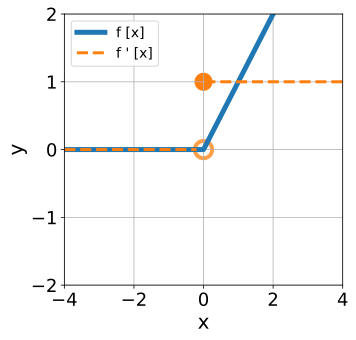

In [15]:
plt.figure(figsize=(5, 5))
x = np.linspace(-4, 4, 1000)
y = np.maximum(0, x)
x1 = np.linspace(-4, 0, 500)
x2 = np.linspace(0, 4, 500)
dy1 = np.zeros(x1.shape)
dy2 = np.ones(x2.shape)
plt.plot(x, y, '-', LineWidth=5, color=colors[0], label='f [x]')
plt.plot(x1[:-25], dy1[:-25], '--', LineWidth=3, color=colors[1], label='f \' [x]')
plt.scatter(0, 0, facecolors='none', edgecolors=colors[1], marker='o', s=300, linewidth=4, alpha=0.75)
plt.scatter(0, 1, facecolors=colors[1], edgecolors=colors[1], marker='o', s=200, linewidth=4)
plt.plot(x2[3:], dy2[3:], '--', LineWidth=3, color=colors[1])
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../figs/ann_relu_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

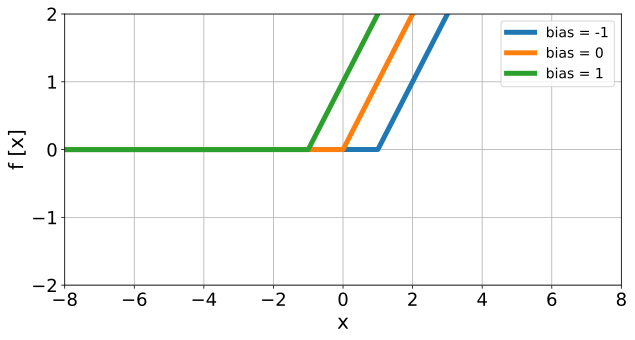

In [16]:
plt.figure(figsize=(10, 5))
cor = 0
for bias in range(-1, 2):
    x = np.linspace(-8, 8, 1000)
    y = np.maximum(0, x + bias)
    plt.plot(x, y, LineWidth=5, color=colors[cor], alpha=1, label='bias = %s' % bias)
    cor += 1
plt.legend()
plt.grid(True)
plt.xlim(-8, 8)
plt.ylim(-2, 2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('f [x]')
# plt.savefig('../figs/ann_relu_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Leaky Rectified Linear Unit function**

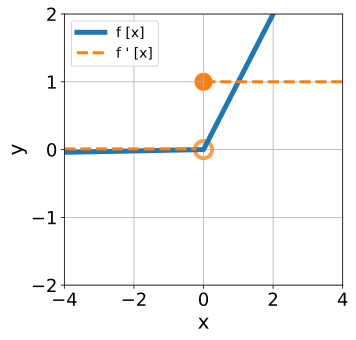

In [17]:
plt.figure(figsize=(5, 5))
x = np.linspace(-4, 4, 1000)
y = np.maximum(0.01 * x, x)
x1 = np.linspace(-4, 0, 500)
x2 = np.linspace(0, 4, 500)
dy1 = np.dot(np.ones(x1.shape), 0.01)
dy2 = np.ones(x2.shape)
plt.plot(x, y, '-', LineWidth=5, color=colors[0], label='f [x]')
plt.plot(x1[:-25], dy1[:-25], '--', LineWidth=3, color=colors[1], label='f \' [x]')
plt.scatter(0, 0, facecolors='none', edgecolors=colors[1], marker='o', s=300, linewidth=4, alpha=0.75)
plt.scatter(0, 1, facecolors=colors[1], edgecolors=colors[1], marker='o', s=200, linewidth=4)
plt.plot(x2[3:], dy2[3:], '--', LineWidth=3, color=colors[1])
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-2, 2)
plt.xticks([-4, -2, 0, 2, 4])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('../figs/ann_lrelu_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

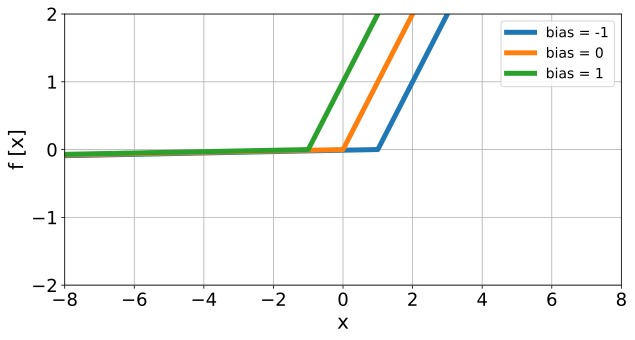

In [18]:
plt.figure(figsize=(10, 5))
cor = 0
for bias in range(-1, 2):
    x = np.linspace(-8, 8, 1000)
    y = np.maximum(0.01 * (x + bias), x + bias)
    plt.plot(x, y, LineWidth=5, color=colors[cor], alpha=1, label='bias = %s' % bias)
    cor += 1
plt.legend()
plt.grid(True)
plt.xlim(-8, 8)
plt.ylim(-2, 2)
plt.xticks([-8, -6, -4, -2, 0, 2, 4, 6, 8])
plt.yticks([-2, -1, 0, 1, 2])
plt.xlabel('x')
plt.ylabel('f [x]')
# plt.savefig('../figs/ann_lrelu_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.show()

**Inverse Squate Root Linear Unit function**

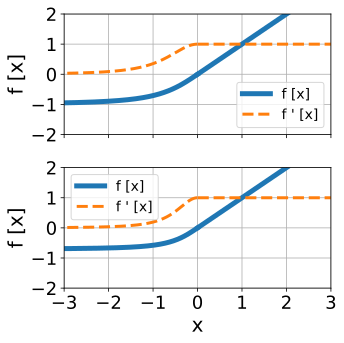

In [19]:
plt.figure(figsize=(5,5))
for a in range(1,3):
    plt.subplot(2,1,a)
    x = np.linspace(-4, 4, 1000)
    y1 = x / np.sqrt(1 + a * x ** 2)
    y2 = x
    dy1 = (1 / np.sqrt(1 + a * x ** 2)) ** 3
    dy2 = np.ones(x.shape)
    plt.plot(x[:500], y1[:500], LineWidth=5, color=colors[0], label='f [x]')
    plt.plot(x[500:], y2[500:], LineWidth=5, color=colors[0])
    plt.plot(x[:500], dy1[:500], '--', LineWidth=3, color=colors[1], label='f \' [x]')
    plt.plot(x[500:], dy2[500:], '--', LineWidth=3, color=colors[1])
    
    plt.legend()
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(-2, 2)
    
    if a == 2:
        plt.xticks([-3, -2, -1, 0, 1, 2, 3])
        plt.xlabel('x')
    else:
        plt.xticks([-3, -2, -1, 0, 1, 2, 3], [])
        plt.xlabel('')
    
    plt.yticks([-2, -1, 0, 1, 2])
    plt.ylabel('f [x]')
    
plt.savefig('../figs/ann_isrlu_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()

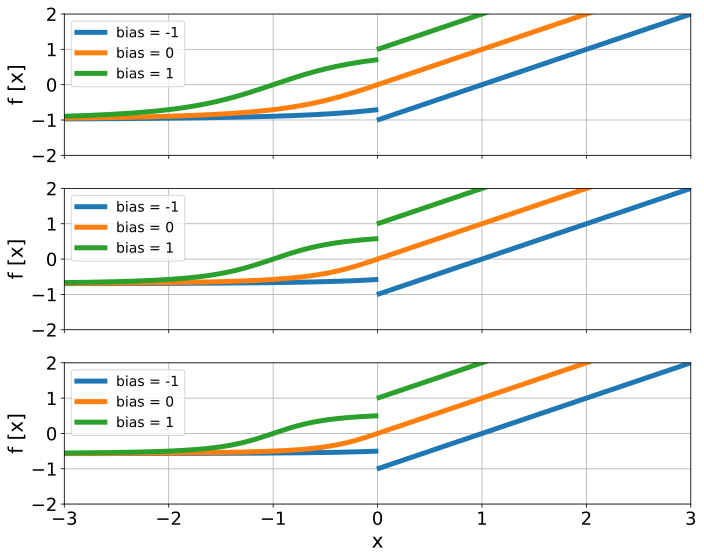

In [20]:
plt.figure(figsize=(10, 8))
for a in range(1,4):
    plt.subplot(3,1,a)
    cor = 0
    for bias in range(-1, 2):
        x = np.linspace(-16, 16, 1000)
        y1 = (x + bias) / np.sqrt(1 + a * (x + bias) ** 2)
        y2 = x + bias
        plt.plot(x[:500], y1[:500], LineWidth=5, color=colors[cor], alpha=1, label='bias = %s' % bias)
        plt.plot(x[500:], y2[500:], LineWidth=5, color=colors[cor], alpha=1)
        cor += 1
    plt.legend()
    plt.grid(True)
    plt.xlim(-3, 3)
    plt.ylim(-2, 2)
    
    if a == 3:
        plt.xticks([-3, -2, -1, 0, 1, 2, 3])
        plt.xlabel('x')
    else:
        plt.xticks([-3, -2, -1, 0, 1, 2, 3], [])
        plt.xlabel('')
    
    plt.yticks([-2, -1, 0, 1, 2])
    plt.ylabel('f [x]')
    
# plt.savefig('../figs/ann_isrlu_function.pdf', format='pdf', bbox_inches='tight', transparent=True)
plt.tight_layout()
plt.show()